# Title: Exercise 8.1 and 8.2
Name: Sanjay Jaras


### Import Libraries

In [1]:
import thinkstats2
import thinkplot
import numpy as np
import random
import math

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')


random.seed(17)
np.random.seed(17)


### Exercise 8.1
In this chapter we used x̄ and median to estimate μ, and found that x̄ yields lower MSE. Also, we used S<sup>2</sup> and S<sup>2</sup><sub>n−1</sub>
to estimate σ, and found that S<sup>2</sup> is biased and  S<sup>2</sup><sub>n−1</sub>  unbiased.
Run similar experiments to see if x̄ and median are biased estimates of μ.
<br/>S<sup>2</sup> yields a lower MSE. Also check whether S<sup>2</sup> or S<sup>2</sup><sub>n−1</sub>



In [2]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

In [3]:
def Estimate1(n=7, m=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1 with size m:', m)
    print('mean error xbar:', MeanError(means, mu), 'mean error median', MeanError(medians, mu))

In [4]:
Estimate1(m=10)
Estimate1(m=100)
Estimate1(m=1000)
Estimate1(m=10000)
Estimate1()


Experiment 1 with size m: 10
mean error xbar: -0.013852600722959496 mean error median 0.04042425006772992
Experiment 1 with size m: 100
mean error xbar: 0.019381449285801308 mean error median 0.03332576848899575
Experiment 1 with size m: 1000
mean error xbar: -0.006529354495368119 mean error median -0.005704182739019149
Experiment 1 with size m: 10000
mean error xbar: -0.0008275024000635333 mean error median 0.0017295167328097605
Experiment 1 with size m: 100000
mean error xbar: 0.0008621453288547502 mean error median 0.0008466091562687169


xbar and median gives lower mean error as m increases, so neither
one is obviously biased, as far as we can tell from the experiment.

In [5]:
def Estimate2(n=7, m=1000):
    """Evaluates S and Sn-1 as estimators of sample variance.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('mean error biased', MeanError(estimates1, sigma**2), 'mean error unbiased', MeanError(estimates2, sigma**2))


In [6]:
Estimate2(m=10)
Estimate2(m=100)
Estimate2(m=1000)
Estimate2(m=10000)

Experiment 2
mean error biased 0.011812408073328196 mean error unbiased 0.18044780941888286
Experiment 2
mean error biased -0.11786712152072858 mean error unbiased 0.02915502489248329
Experiment 2
mean error biased -0.15338131124556856 mean error unbiased -0.012278196453163307
Experiment 2
mean error biased -0.13744385977507287 mean error unbiased 0.0063154969290816695


The biased estimator of variance gives lower RMSE than the unbiased
estimator. And the difference is consistent as m increases.


### Exercise 8.2
Suppose you draw a sample with size n = 10 from an exponen-
tial distribution with λ = 2. Simulate this experiment 1000 times and plot
the sampling distribution of the estimate L. Compute the standard error of
the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of
standard error versus n.

In [7]:
def SimulateSample(lam=2, n=10, m=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    m: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        lamhat = 1/np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print("Sample Size:", n)


    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('standard error', stderr, 'confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    title="Sampling distribution for Sample Size:" + str(n)
    thinkplot.Show(xlabel="Estimates", ylabel="CDF", title = title)

    return stderr


Experiment 3
Sample Size: 10
standard error 0.8967179115445979 confidence interval (1.2901330772324622, 3.869233489242792)


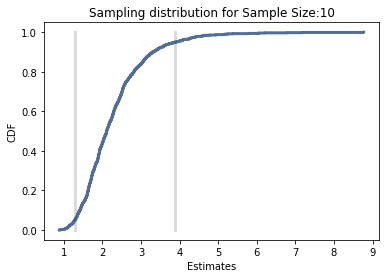

Sample Size: 10 Std Error: 0.8967179115445979


Sample Size: 100
standard error 0.21111857936643746 confidence interval (1.717943226895032, 2.3887031376972865)


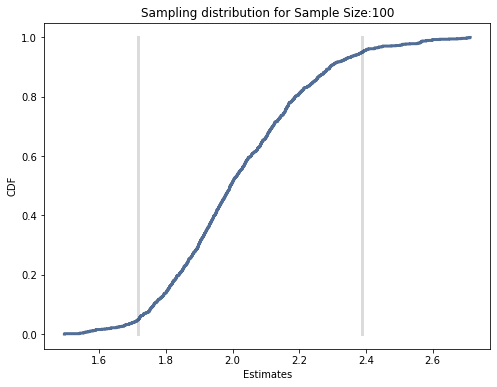

Sample Size: 100 Std Error: 0.21111857936643746


Sample Size: 1000
standard error 0.061559751282795346 confidence interval (1.9023814501496725, 2.107175508049055)


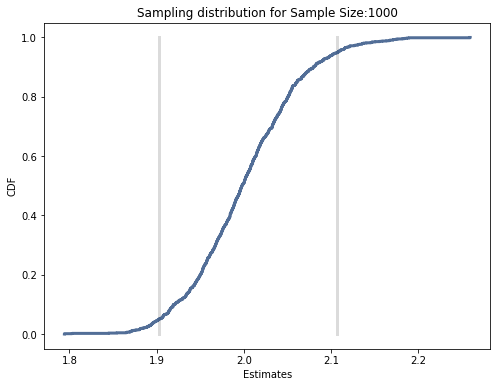

Sample Size: 1000 Std Error: 0.061559751282795346




<Figure size 576x432 with 0 Axes>

In [8]:
print('Experiment 3')
for n in [10, 100, 1000]:
    stderr = SimulateSample(n=n)
    print("Sample Size:", n,"Std Error:", stderr, end="\n\n\n")

As sample size increases, standard error and the width of
the CI decrease.
All three confidence intervals contain the actual value, 2.